In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install pycaret
from pycaret.classification import *
#from pycaret.regression import *

# Importing the data - only use *.MLReady.csv files!!!

In [2]:
df=pd.read_csv("../../data/epoch2MLclean2.csv")
df.head()

,origIntRate,origUPB,origLTV,origDebtIncRatio,stateNumber,zeroBalCode,fredRate
0,5.125,348000,87,50,49,1,2.87
1,4.625,195000,52,54,32,0,2.87
2,4.875,342000,80,54,50,0,2.87
3,5.375,93000,70,50,23,1,2.87
4,4.875,182000,76,22,20,0,2.87


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 7 columns):
origIntRate         119696 non-null float64
origUPB             119696 non-null int64
origLTV             119696 non-null int64
origDebtIncRatio    119696 non-null int64
stateNumber         119696 non-null int64
zeroBalCode         119696 non-null int64
fredRate            119696 non-null float64
dtypes: float64(2), int64(5)
memory usage: 6.4 MB


# Coerce the column dtype (int in this case)

In [7]:
df = df.astype({'origLTV':'int', 'origDebtIncRatio':'int',\
                'zeroBalCode':'object'})
#,'zeroBalCode':'int'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 7 columns):
origIntRate         119696 non-null float64
origUPB             119696 non-null int64
origLTV             119696 non-null int32
origDebtIncRatio    119696 non-null int32
stateNumber         119696 non-null int64
zeroBalCode         119696 non-null object
fredRate            119696 non-null float64
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 5.5+ MB


In [9]:
model_setup = setup(df, target = 'zeroBalCode', ignore_low_variance = True,
                   numeric_features = ['origLTV', 'origDebtIncRatio'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5006
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(119696, 7)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# Pycaret - Setup with categorical definition

## Compare Models with blacklist exclusions

In [10]:
model_results=compare_models(fold = 2)
model_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.8637,0.6575,0,0,0,0
1,Naive Bayes,0.8637,0.7183,0,0,0,0
2,SVM - Linear Kernel,0.8637,0,0,0,0,0
3,Ridge Classifier,0.8637,0,0,0,0,0
4,Linear Discriminant Analysis,0.8637,0.7564,0.0123,0.5,0.0239,0.0175
5,Extreme Gradient Boosting,0.8635,0.7625,0.0665,0.4904,0.1171,0.0876
6,Gradient Boosting Classifier,0.8626,0.7634,0.0797,0.4759,0.1365,0.1014
7,Ada Boost Classifier,0.8618,0.7516,0.0893,0.4554,0.1479,0.1094
8,Extra Trees Classifier,0.8589,0.7319,0.0464,0.3621,0.0822,0.053
9,CatBoost Classifier,0.8571,0.749,0.0806,0.3853,0.1331,0.0902


## Create models - store in variable

In [11]:
egb = create_model('xgboost', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8658,0.7818,0.0570,0.5652,0.1036,0.0807
1,0.8669,0.7539,0.1004,0.5750,0.1710,0.1359
2,0.8628,0.7781,0.0655,0.4839,0.1154,0.0856
3,0.8627,0.7827,0.0658,0.4688,0.1154,0.0847
4,0.8615,0.7508,0.0439,0.4167,0.0794,0.0549
Mean,0.8639,0.7695,0.0665,0.5019,0.1169,0.0883
SD,0.0021,0.0141,0.0187,0.0601,0.0301,0.0263


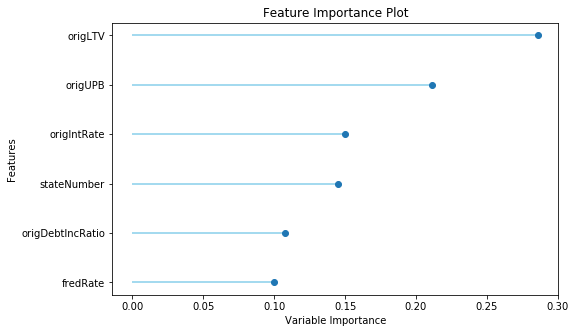

In [12]:
plot_model(egb, plot = 'feature')

In [13]:
finalize_model(egb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=5006,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [14]:
save_model(egb, 'egbTestPkl')

Transformation Pipeline and Model Succesfully Saved
